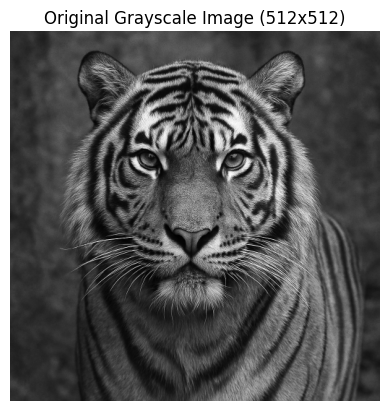

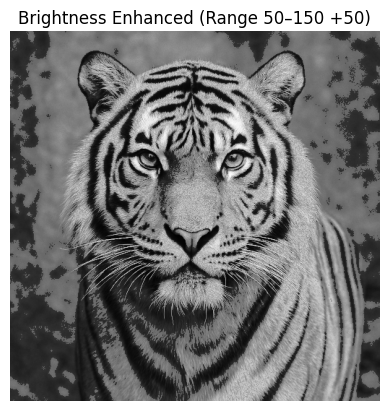

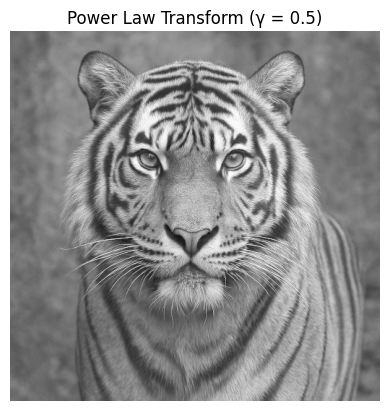

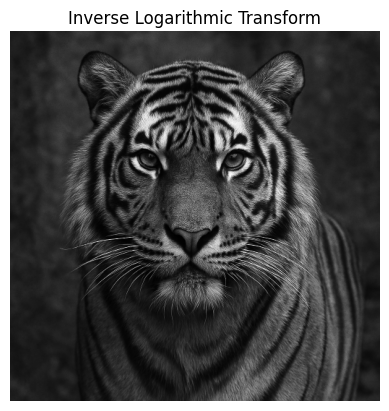

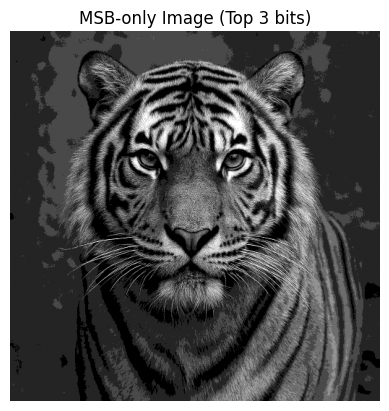

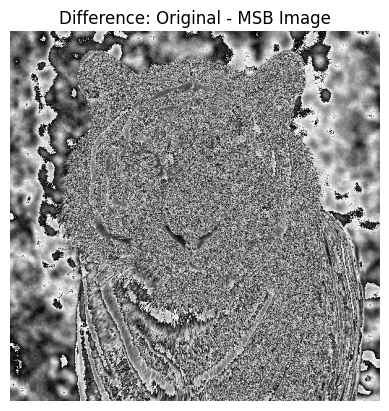

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images/tiger.png', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (512, 512))

# Function to display an image using matplotlib
def show(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# (a) Brightness enhancement of a specific gray level range
def enhance_brightness_range(img, lower=50, upper=150, increment=50):
    enhanced = img.copy()
    mask = (img >= lower) & (img <= upper)
    enhanced[mask] = np.clip(enhanced[mask] + increment, 0, 255)
    return enhanced

bright_enhanced = enhance_brightness_range(image)

# (b) Power law and inverse logarithmic transforms
def power_law(img, gamma=0.5, c=1):
    norm_img = img / 255.0
    transformed = c * np.power(norm_img, gamma)
    return np.uint8(transformed * 255)

def inverse_log(img, c=255/np.log(1 + 255)):
    norm_img = img / 255.0
    transformed = np.exp(norm_img) - 1
    return np.uint8((transformed / transformed.max()) * 255)

power_img = power_law(image)
inverse_log_img = inverse_log(image)

# (c) Difference image between original and image obtained from top 3 MSBs
def extract_msb(img, bits=3):
    shift = 8 - bits
    msb = (img >> shift) << shift
    return msb

msb_img = extract_msb(image, 3)
diff_img = cv2.absdiff(image, msb_img)

# Displaying all results
show(image, "Original Grayscale Image (512x512)")
show(bright_enhanced, "Brightness Enhanced (Range 50–150 +50)")
show(power_img, "Power Law Transform (γ = 0.5)")
show(inverse_log_img, "Inverse Logarithmic Transform")
show(msb_img, "MSB-only Image (Top 3 bits)")
show(diff_img, "Difference: Original - MSB Image")
